In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pickle
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import datetime
import gc
gc.collect()
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from faker import Faker
import json
import re
import os
from dotenv import load_dotenv
import openai

pd.options.display.max_columns=299

ModuleNotFoundError: No module named 'faker'

#  Draft Notebook

In [3]:
load_dotenv()
OPENAI_KEY = os.environ["OPENAI_KEY"]
openai.api_key = OPENAI_KEY

NameError: name 'openai' is not defined

In [39]:
main_dir='data/m5-forecasting-accuracy/'

sales=pd.read_csv(main_dir+'sales_train_evaluation.csv')

sales.iloc[:6].to_csv("data_train_walmart.csv", index=False)

In [27]:
df_extract = sales.iloc[:4, :6]

d_json = dict()
for col in df_extract:
    d_json[col] = df_extract[col].values.tolist()

with open('data/data_extract.json', 'w') as f:
    json.dump(d_json, f)

In [7]:
l_cols = sales.columns

In [15]:
l_cols

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)

## ChatGPT

In [14]:
MODEL = "gpt-3.5-turbo"

In [32]:
response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a smart data analyst assistant."},
        {"role": "user", "content": "Help me find the right graphs to create"},
        {"role": "assistant", "content": "Sure, I'd be happy to!"},
        {"role": "user", "content": "I have these columns :  'id' : numerical, 'item_id' : categorical,\
         'dept_id':categorical, 'cat_id':categorical, 'store_id':categorical, \
         'state_id':categorical, 'sales_day':numerical what are the best analysis to run "},
        #{"role": "assistant", "content": "Things working well together will increase revenue."},
        #{"role": "user", "content": "Let's circle back when we have more bandwidth to touch base on opportunities for increased leverage."},
        #{"role": "assistant", "content": "Let's talk later when we're less busy about how to do better."},
        #{"role": "user", "content": "This late pivot means we don't have time to boil the ocean for the client deliverable."},
    ],
    temperature=0.9,
)

print(response["choices"][0]["message"]["content"])

Based on the columns you listed, there are several potential analyses you could do. Here are a few suggestions:

1. Time series analysis: With the 'sales_day' column you can perform a time series analysis to understand the trend in sales over time. You could plot the sales by day, week, or month and look for trends, seasonality, or other patterns.

2. Scatter plot: You could create a scatter plot to see if there is any relationship between 'sales_day' and 'id'.

3. Bar chart: A bar chart could be created to show the total sales for each 'store_id' or 'item_id', you could also group these by 'cat_id' or 'dept_id' to compare sales across different product categories or departments.

4. Box plot: A box plot could be used to show the distribution of sales across different 'store_id' or 'item_id' categories.

5. Heatmap: You could create a heatmap to visualize the correlation between different variables in your dataset, for example the correlation between the 'sales_day' and 'id' columns.



In [33]:
response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a smart data analyst assistant."},
        {"role": "user", "content": "Help me find the right graphs to create"},
        {"role": "assistant", "content": "Sure, I'd be happy to!"},
        {"role": "user", "content": "I have these columns :  'id', 'item_id',\
         'dept_id', 'cat_id', 'store_id', 'state_id' what are the best analysis to run and \
         and can you create them in streamlit"},
        #{"role": "assistant", "content": "Things working well together will increase revenue."},
        #{"role": "user", "content": "Let's circle back when we have more bandwidth to touch base on opportunities for increased leverage."},
        #{"role": "assistant", "content": "Let's talk later when we're less busy about how to do better."},
        #{"role": "user", "content": "This late pivot means we don't have time to boil the ocean for the client deliverable."},
    ],
    temperature=0,
)

In [34]:
response

<OpenAIObject chat.completion id=chatcmpl-6swrWepSojn2B4lp8zZCHNXKiip5v at 0x112fe5770> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "It depends on what kind of data you have in each column and what kind of questions you want to answer. Here are some potential analyses you could run:\n\n1. Count of items by department: This would show you how many items are in each department. You could create a bar chart or a pie chart to display this information.\n\n2. Sales by category: This would show you how much revenue each category is generating. You could create a bar chart or a line chart to display this information.\n\n3. Sales by store: This would show you how much revenue each store is generating. You could create a bar chart or a line chart to display this information.\n\n4. Sales by state: This would show you how much revenue each state is generating. You could create a bar chart or a line chart to display this inform

In [ ]:

# Permet de donner des exemples de réponses attendues dans la conversation.
# The business jargon translation example, but with example names for the example messages
response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful, pattern-following assistant that translates corporate jargon into plain English."},
        {"role": "system", "name":"example_user", "content": "New synergies will help drive top-line growth."},
        {"role": "system", "name": "example_assistant", "content": "Things working well together will increase revenue."},
        {"role": "system", "name":"example_user", "content": "Let's circle back when we have more bandwidth to touch base on opportunities for increased leverage."},
        {"role": "system", "name": "example_assistant", "content": "Let's talk later when we're less busy about how to do better."},
        {"role": "user", "content": "This late pivot means we don't have time to boil the ocean for the client deliverable."},
    ],
    temperature=0,
)

print(response["choices"][0]["message"]["content"])

## Product analytics dataset

In [43]:
l_cols = ["user_id", "app_version", "onboarding_date", "product_event_type",
         "event_time", "platform", "event_duration", "user_segment", "age", "sex",
         "referral_source", "subscription_status", "user_event_type"]

fake = Faker(seed=0)

In [45]:
l_dates = 
fake.date_between(start_date = datetime.datetime(2022,1,1),
                 end_date = datetime.datetime(2023,1,1))

datetime.date(2022, 4, 21)

In [ ]:
l_product_events = ["page_view", "form_submission", "usage_feature1", "usage_feature2"]
l_user_segments = ["power users", "new users", "occasional", "experienced users"]

In [53]:
df = pd.DataFrame()
df["user_id"] = np.random.randint(1,20, size= 100)
df["app_version"] = np.random.randint(1,3, size= 100)

d_onboard_date = pd.DataFrame()

d_onboard_date["user_id"] = df["user_id"].unique()
l_dates_o = []
for _ in range(len(d_onboard_date)):
    l_dates_o.append(fake.date_between(start_date = datetime.datetime(2022,1,1),
                 end_date = datetime.datetime(2023,1,1)))
    
    
d_onboard_date["date_onboarding"] = l_dates_o
d_onboard_date["age"] = np.random.randint(20, 30, size = len(d_onboard_date))
d_onboard_date["sex"] = np.randomn.choice(["MALE", "FEMALE"], size = len(d_onboard_date))




df = pd.merge(df, df_onboard, how="left", on ="user_id")

In [54]:
df

,user_id,app_version,date_onboarding
0,18,1,2022-01-17
1,12,1,2022-08-06
2,4,1,2022-10-29
3,3,1,2022-07-20
4,5,2,2022-04-10
...,...,...,...
95,7,1,2022-10-25
96,19,2,2022-12-29
97,16,1,2022-07-08
98,1,2,2022-05-05


In [59]:
response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a helpful data product manager assistant"},
        {"role": "user", "content": "Give me a list of  user segments I can create in my \
        feature usage dataset of my software"},
    ],
    temperature=0.4,
)

In [60]:
print(response["choices"][0]["message"]["content"])

Sure, here are some potential user segments you could create based on your feature usage dataset:

1. Power users: Users who regularly use advanced features and tools within your software.
2. Occasional users: Users who only use your software on a sporadic basis and may only use basic features.
3. New users: Users who have recently signed up for your software and are still learning how to use it.
4. Experienced users: Users who have been using your software for a long time and are familiar with all of its features.
5. Mobile users: Users who primarily access your software through a mobile device.
6. Desktop users: Users who primarily access your software through a desktop or laptop computer.
7. Free users: Users who are using the free version of your software.
8. Paid users: Users who have paid for a premium version of your software.
9. Enterprise users: Users who are part of a larger organization and use your software for business purposes.
10. Personal users: Users who use your softw

## Google Dataset

In [76]:
df = pd.read_csv("../data/sample_date_reduced.csv")

In [93]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.transactionRevenue

In [143]:
l_cols_keep = ["channelGrouping", "date", "fullVisitorId","totals.transactionRevenue",
              "sessionId", "visitNumber", "visitStartTime",
              "device.browser", "device.deviceCategory",
              "geoNetwork.city", "totals.bounces", "totals.hits",
              "totals.pageviews",
              "trafficSource.medium", "trafficSource.referralPath"]

df_reduced = df[l_cols_keep]

In [95]:
df_reduced["totals.bounces"].fillna(0, inplace=True)
df_reduced["trafficSource.referralPath"].fillna("no_referreal", inplace=True)

In [98]:
df_reduced.to_csv("../data/google_website_data.csv", index=False)

In [97]:
df_reduced.head(1)

,channelGrouping,date,fullVisitorId,totals.transactionRevenue,sessionId,visitNumber,visitStartTime,device.browser,device.deviceCategory,geoNetwork.city,totals.bounces,totals.hits,totals.pageviews,trafficSource.medium,trafficSource.referralPath
0,Organic Search,20170126,8717947855351915792,NaN,8717947855351915792_1485451666,1,1485451666,Chrome,desktop,not available in demo dataset,0.0,12,10,organic,no_referreal


In [144]:
df_reduced["date"] = pd.to_datetime(df_reduced["date"], format="%Y%m%d")

In [145]:
df_reduced

,channelGrouping,date,fullVisitorId,totals.transactionRevenue,sessionId,visitNumber,visitStartTime,device.browser,device.deviceCategory,geoNetwork.city,totals.bounces,totals.hits,totals.pageviews,trafficSource.medium,trafficSource.referralPath
0,Organic Search,2017-01-26,8717947855351915792,NaN,8717947855351915792_1485451666,1,1485451666,Chrome,desktop,not available in demo dataset,NaN,12,10,organic,NaN
1,Organic Search,2017-03-12,186969402159863462,NaN,0186969402159863462_1489329703,1,1489329703,Chrome,desktop,not available in demo dataset,1.0,1,1,organic,NaN
2,Social,2017-03-12,8751643198858600189,NaN,8751643198858600189_1489364717,1,1489364717,Safari (in-app),mobile,not available in demo dataset,NaN,5,5,referral,/yt/about/
3,Social,2016-11-18,4659677781302064733,NaN,4659677781302064733_1479487507,1,1479487507,Chrome,desktop,Ho Chi Minh City,1.0,1,1,referral,/yt/about/vi/
4,Direct,2016-11-10,9312348339658802778,NaN,9312348339658802778_1478813349,2,1478813349,Chrome,desktop,not available in demo dataset,1.0,1,1,(none),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Social,2016-09-08,6131905045836291822,NaN,6131905045836291822_1473340498,1,1473340498,Safari,desktop,not available in demo dataset,1.0,1,1,referral,/yt/about/
252,Social,2016-10-05,6673583350920317221,NaN,6673583350920317221_1475735400,5,1475735400,Chrome,desktop,Dubai,1.0,1,1,referral,/yt/about/ar/
253,Direct,2016-12-29,3209725923026135905,NaN,3209725923026135905_1483059914,1,1483059914,Chrome,desktop,not available in demo dataset,1.0,1,1,(none),NaN
254,Direct,2017-05-31,9567474007949365633,NaN,9567474007949365633_1496274875,1,1496274875,Chrome,desktop,Mountain View,1.0,1,1,(none),NaN


Text(0.5, 1.0, 'Mobile hits by date')

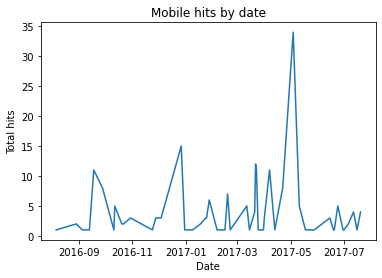

In [146]:
# Filter the data to only include rows where device.deviceCategory is 'mobile'
mobile_data = df_reduced[df_reduced['device.deviceCategory'] == 'mobile']

# Group the data by date and sum the totals.hits column
mobile_hits_by_date = mobile_data.groupby('date')['totals.hits'].sum().reset_index()

# Create a line chart of mobile hits by date
fig, ax = plt.subplots()
ax.plot(mobile_hits_by_date['date'], mobile_hits_by_date['totals.hits'])
ax.set_xlabel('Date')
ax.set_ylabel('Total hits')
ax.set_title('Mobile hits by date')

In [120]:
response = openai.ChatCompletion.create(
    model=MODEL,
    messages=[
        {"role": "system", "content": "You are a smart data analyst assistant which is expert in \
        data vizualisation with streamlit."},
        {"role": "system", "name":"example_user", "content": 
         "Can you create a graph of totals.pageviews depending of the time"},
        {"role": "system", "name":"example_assistant", "content":
         "# Graph creation \
                fig, ax = plt.subplots() \
                ax.plot(df['time'], df['totals.pageviews']) \
                ax.set_xlabel('time') \
                ax.set_ylabel('totals.pageviews') \
                ax.set_title('Pageviews over time') \
                # Show the chart in Streamlit \
                st.pyplot(fig)"},
        
        
        {"role": "system", "name":"example_user", "content": 
        "Can you create a graph of totals.pageviews depending of the device.browser"},
        {"role": "system", "name": "example_assistant", "content": 
         "browser_data = df.groupby('device.browser')['totals.pageviews'].sum().reset_index() \
         browser_data = browser_data.sort_values('totals.pageviews', ascending=False) \
                # Graph creation \
                fig, ax = plt.subplots() \
                ax.bar(browser_data['device.browser'], browser_data['totals.pageviews']) \
                ax.set_xlabel('device.browser') \
                ax.set_ylabel('totals.pageviews') \
                ax.set_title('Pageviews in function of the device.brower') \
                # Show the chart in Streamlit \
                st.pyplot(fig)"},
        {"role": "user", "content": 
         "Can you create a graph of totals.hits depending of the date for device.deviceCategory equal to mobile"},
    ],
    temperature=0.2,
)

In [122]:
text = response["choices"][0]["message"]["content"]
print(text)

Certainly! Here's an example code snippet that should do what you're asking for:

```
# Filter the data to only include rows where device.deviceCategory is 'mobile'
mobile_data = df[df['device.deviceCategory'] == 'mobile']

# Group the data by date and sum the totals.hits column
mobile_hits_by_date = mobile_data.groupby('date')['totals.hits'].sum().reset_index()

# Create a line chart of mobile hits by date
fig, ax = plt.subplots()
ax.plot(mobile_hits_by_date['date'], mobile_hits_by_date['totals.hits'])
ax.set_xlabel('Date')
ax.set_ylabel('Total hits')
ax.set_title('Mobile hits by date')
st.pyplot(fig)
```

This code should create a line chart showing the total hits for mobile devices over time. Let me know if you have any questions or if there's anything else I can help you with!


In [133]:
print(text.split("```")[1])


# Filter the data to only include rows where device.deviceCategory is 'mobile'
mobile_data = df[df['device.deviceCategory'] == 'mobile']

# Group the data by date and sum the totals.hits column
mobile_hits_by_date = mobile_data.groupby('date')['totals.hits'].sum().reset_index()

# Create a line chart of mobile hits by date
fig, ax = plt.subplots()
ax.plot(mobile_hits_by_date['date'], mobile_hits_by_date['totals.hits'])
ax.set_xlabel('Date')
ax.set_ylabel('Total hits')
ax.set_title('Mobile hits by date')
st.pyplot(fig)

